<a href="https://colab.research.google.com/github/cocoisland/DS-Unit-4-Sprint-3-Neural-Networks/blob/master/module3-Intro-to-Keras/LS_DS_433_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [30]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data

--2019-04-03 22:32:11--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49081 (48K) [text/plain]
Saving to: ‘housing.data’

housing.data        100%[===================>]  47.93K  --.-KB/s    in 0.02s   

2019-04-03 22:32:12 (1.90 MB/s) - ‘housing.data’ saved [49081/49081]



In [36]:
import numpy

dataset = numpy.loadtxt('housing.data')
# Split into X and Y variables
X = dataset
print(f' X.shape = {X.shape}')
print(X[0:3])
Y = dataset[:,-1]
print(f' Y shape = {Y.shape}')
print(Y[:5])

 X.shape = (506, 14)
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00 3.4700e+01]]
 Y shape = (506,)
[24.  21.6 34.7 33.4 36.2]


In [44]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [0]:
import pandas

dataframe = pandas.read_csv("housing.data", delim_whitespace=True, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

In [49]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [54]:
# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
baseline_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [46]:
# evaluate  baseline model with 10-fold cross.
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Results: -31.28 (23.60) MSE


In [0]:
# standardized dataset with StandardScaler()

def run_model(model):
  numpy.random.seed(seed)
  estimators = []
  estimators.append(('standardize', StandardScaler()))
  estimators.append(('mlp', KerasRegressor(build_fn=model, epochs=50, batch_size=5, verbose=0)))
  pipeline = Pipeline(estimators)
  kfold = KFold(n_splits=10, random_state=seed)
  results = cross_val_score(pipeline, X, Y, cv=kfold)
  return("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [57]:
# evaluate model with standardized dataset. Boston dataset varies from 
run_model(baseline_model)

'Standardized: -29.34 (27.46) MSE'

In [53]:
# improve the performance a neural network by adding more layers. 
def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
larger_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_42 (Dense)             (None, 6)                 84        
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 7         
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [58]:
%%time
run_model(larger_model)

CPU times: user 1min 31s, sys: 2.9 s, total: 1min 34s
Wall time: 1min 21s


'Standardized: -23.12 (26.79) MSE'

In [59]:
# define wider model to increase the representational capability of the model
def wider_model():
	# create model
	model = Sequential()
	model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
wider_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_97 (Dense)             (None, 1)                 21        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [63]:
%%time
run_model(wider_model)

CPU times: user 2min 8s, sys: 2.5 s, total: 2min 10s
Wall time: 1min 59s


'Standardized: -24.18 (24.91) MSE'

In [65]:
model = Sequential()
model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X, Y, epochs=20)

Epoch 1/20
506/506 [==============================] - 4s 8ms/step - loss: 222.1097
Epoch 2/20
506/506 [==============================] - 0s 80us/step - loss: 123.3372
Epoch 3/20
506/506 [==============================] - 0s 76us/step - loss: 97.3011
Epoch 4/20
506/506 [==============================] - 0s 79us/step - loss: 80.4778
Epoch 5/20
506/506 [==============================] - 0s 75us/step - loss: 70.6488
Epoch 6/20
506/506 [==============================] - 0s 84us/step - loss: 67.2735
Epoch 7/20
506/506 [==============================] - 0s 77us/step - loss: 65.0929
Epoch 8/20
506/506 [==============================] - 0s 77us/step - loss: 62.8735
Epoch 9/20
506/506 [==============================] - 0s 74us/step - loss: 62.0545
Epoch 10/20
506/506 [==============================] - 0s 83us/step - loss: 60.3075
Epoch 11/20
506/506 [==============================] - 0s 80us/step - loss: 59.6000
Epoch 12/20
506/506 [==============================] - 0s 79us/step - loss: 58.8483


In [75]:
history.history

{'loss': [222.1097436837057,
  123.33721293573794,
  97.30106109498517,
  80.47776960289997,
  70.64882762441522,
  67.2735438591878,
  65.0928845311342,
  62.873540795367695,
  62.0544910657076,
  60.30750286720487,
  59.60000369105886,
  58.84832127386402,
  58.4084570059192,
  56.68066460530277,
  56.12534014132654,
  55.428111532460086,
  54.311371784436375,
  53.62096067285349,
  53.04307363155802,
  52.15456826130863]}

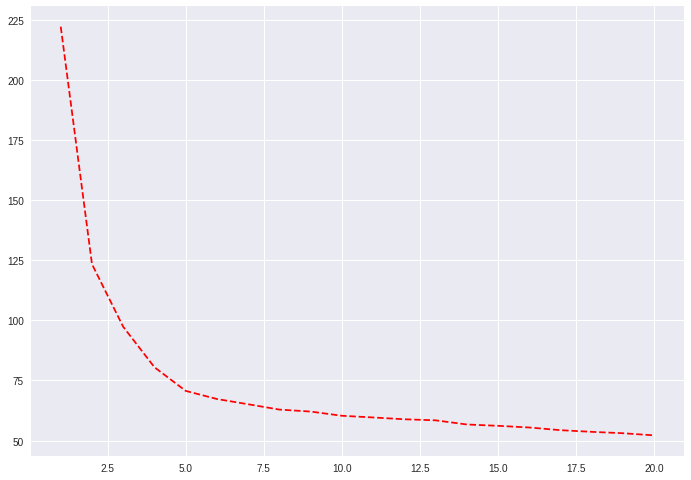

In [76]:
import matplotlib.pyplot as plt
training_loss = history.history['loss']
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.show();

In [90]:
X.shape,Y.shape

((506, 13), (506,))

In [95]:
# Data preparation for Linear Regression testing.

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [92]:
# Linear Regression for comparation.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_predict = lin_model.predict(X_test)
rmse = mean_squared_error(Y_test, y_predict)

print('RMSE is {}'.format(rmse))


RMSE is 20.869292183770884


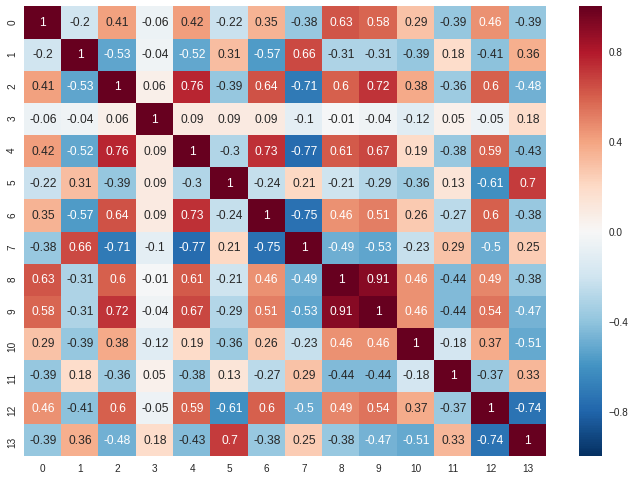

In [79]:
# column 13 is the y.
# only column 12 is highly correlated to column 13 by 0.74
# column 10 correlated to column 13 by 0.51
import seaborn as sns

correlation_matrix = dataframe.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [0]:
X=dataset[:,(10,12)]
Y=dataset[:,13]

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((404, 2), (102, 2), (404,), (102,))

In [98]:
# Linear Regression for dataset[10,12]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_predict = lin_model.predict(X_test)
rmse = mean_squared_error(Y_test, y_predict)

print('RMSE is {}'.format(rmse))

RMSE is 35.00959639406226


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np

In [100]:
# global hyperparameters

batch_size = 64
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

11493376/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


In [105]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(784,)))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_172 (Dense)            (None, 16)                12560     
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_173 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_174 (Dense)            (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [118]:


history = model.fit(x_train, y_train, epochs=epochs, validation_split=.1)
#scores = model.evaluate(x_test,y_test)
#print(f'{model.metrics_names[1]}: {scores[1]*100}')

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 5s 102us/step - loss: 0.0114 - val_loss: 0.0071
Epoch 2/20
54000/54000 [==============================] - 5s 91us/step - loss: 0.0114 - val_loss: 0.0063
Epoch 3/20
54000/54000 [==============================] - 5s 92us/step - loss: 0.0112 - val_loss: 0.0070
Epoch 4/20
54000/54000 [==============================] - 5s 96us/step - loss: 0.0114 - val_loss: 0.0066
Epoch 5/20
54000/54000 [==============================] - 5s 97us/step - loss: 0.0112 - val_loss: 0.0066
Epoch 6/20
54000/54000 [==============================] - 5s 98us/step - loss: 0.0111 - val_loss: 0.0066
Epoch 7/20
54000/54000 [==============================] - 5s 98us/step - loss: 0.0109 - val_loss: 0.0066
Epoch 8/20
54000/54000 [==============================] - 5s 96us/step - loss: 0.0108 - val_loss: 0.0065
Epoch 9/20
54000/54000 [==============================] - 5s 97us/step - loss: 0.0108 - val_loss: 0.0070
Epoch

In [122]:
loss_score = model.evaluate(x_test,y_test)
loss_mean = np.mean(history.history['loss'])
val_loss_mean = np.mean(history.history['val_loss'])
print(f'Loss score={loss_scores}, train Loss mean={loss_mean}, test Loss mean={val_loss_mean}')


10000/10000 [==============================] - 1s 70us/step
Loss score=0.008145789729373791, train Loss mean=0.010779303380560466, test Loss mean=0.006746596823760229


## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.